# Wieloagentowe Sekwencyjne Podejmowanie Decyzji

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Proces Decyzyjny Markowa (MDP)

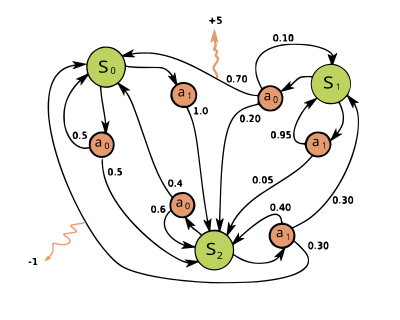

In [ ]:
# Grid parameters
rows, cols = 4, 12
start = (3, 0)
goal = (3, 11)
cliff = [(3, j) for j in range(1, 11)]
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # up, down, left, right

def next_state(state, action_idx):
    row, col = state
    dr, dc = actions[action_idx]
    new_row = min(max(row + dr, 0), rows - 1)
    new_col = min(max(col + dc, 0), cols - 1)
    return (new_row, new_col)


def TR(state, action_idx):
    intended_next = next_state(state, action_idx)
    if intended_next == goal:
        return 0, intended_next
    elif intended_next in cliff:
        return -100, start
    else:
        return -1, intended_next

# MDP components
gamma = 0.9
S = [(i, j) for i in range(rows) for j in range(cols)]
A = actions
T = next_state
R = lambda s, a_idx: TR(s, a_idx)[0]

### Ćwiczenie 1

* Opisz czym jest i jak definiujemy Proces Decyzyjny Markowa (MDP) na przykładzie środowiska [Cliff Walking](https://gymnasium.farama.org/environments/toy_text/cliff_walking/)

### Rozwiązanie 1

Proces Decyzyjny Markowa - opis środowiska, w którym znajduje się agent

Definicja procesu w kontekście środowiska Cliff Walking:
MDP=(S,A,P,R,γ)

- S - zbiór stanów, każda kratka na planszy
- A - akcje agenta - 4 akcje: w górę, w dół, w lewo, w prawo
- T - przejście - zmiana stanu po wykonaniu akcji, przejście do innej sąsiadującej akcji
- R - nagroda, którą agent dostaje za podjęcie danej akcji w zależności od stanu, za każdy krok dostaje nagrodę -1, a za wpadnięcie do dziury dostaje -100
- współczynnik gamma - współczynnik dyskuntujący z przedziału <0, 1>, określający wagę przyszłych nagród

Defincija elementów MDP w środowisku Cliff Walking:
- S = [[i, j] dla każdego z 4 wiersza i oraz dla kazdej z 12 kolumn j]
- A = [
  0: Move up,
1: Move right,
2: Move down,
3: Move left
]
- T - f1(s' | s, a) - funkcja zwracająca nowy stan w zależności od aktualnego stanu agenta i bieżącej akcji
- R - f2(s, a, s') - funkcja zwracająca wartość nagrody w zależności od bieżącego stanu, podjętej akcji oraz nowego stanu, w przypadku cliff walking do określenia nagrody wystarczająca jest informacja o nowym stanie
- współczynnik gamma - wyznaczany w implementacji
- stan początkowy - punkt [3, 0]- stan gdzie domyślnie znajduje się agent na początku
- stan końcowy - punkt [3, 11] - stan, do którego dąży agent, po dotarciu do niego kończy działanie

## Q-learning

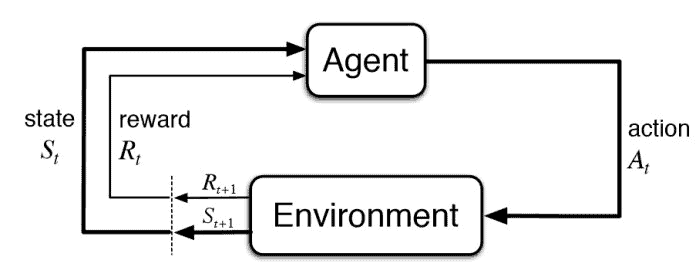

In [ ]:
q_table = np.zeros((rows, cols, len(actions)))
alpha = 0.1
epsilon = 0.1
num_episodes = 500

for _ in range(num_episodes):
    state = start
    while state != goal:
        if np.random.rand() < epsilon:
            action_idx = np.random.randint(len(actions))
        else:
            action_idx = np.argmax(q_table[state[0], state[1]])
        r, next_s = TR(state, action_idx)
        target = r if next_s == goal else r + gamma * np.max(q_table[next_s[0], next_s[1]])
        q_table[state[0], state[1], action_idx] += alpha * (target - q_table[state[0], state[1], action_idx])
        state = next_s

# Extract optimal path
state = start
path = [state]
while state != goal:
    action_idx = np.argmax(q_table[state[0], state[1]])
    _, next_s = TR(state, action_idx)
    state = next_s
    path.append(state)
print("Optimal path:", path)

Optimal path: [(3, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (3, 11)]


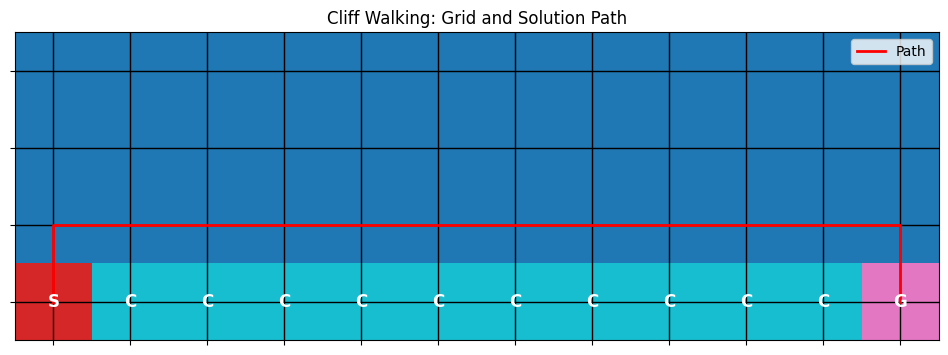

In [ ]:
grid = np.zeros((rows, cols))
grid[start] = 1
grid[goal] = 2
for c in cliff:
    grid[c] = 3

plt.figure(figsize=(12, 4))
plt.imshow(grid, cmap='tab10', interpolation='nearest')
plt.grid(True, which='both', color='black', linewidth=1)
plt.xticks(np.arange(-0.5, cols, 1))
plt.yticks(np.arange(-0.5, rows, 1))
plt.gca().set_xticks(np.arange(cols), minor=False)
plt.gca().set_yticks(np.arange(rows), minor=False)
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
path_x = [p[1] for p in path]
path_y = [p[0] for p in path]
plt.plot(path_x, path_y, 'r-', linewidth=2, label='Path')
plt.text(start[1], start[0], 'S', ha='center', va='center', color='white', fontsize=12, weight='bold')
plt.text(goal[1], goal[0], 'G', ha='center', va='center', color='white', fontsize=12, weight='bold')
for c in cliff:
    plt.text(c[1], c[0], 'C', ha='center', va='center', color='white', fontsize=12, weight='bold')

plt.title("Cliff Walking: Grid and Solution Path")
plt.legend()
plt.show()

### Ćwiczenie 2

- Wyjaśnij, czym jest uczenie się przez wzmacnianie (reinforcement learning) i jak różni się od innych metod uczenia maszynowego, takich jak uczenie nadzorowane?
- Co oznacza litera "Q" w nazwie Q-learning i jaką rolę odgrywa w tym algorytmie?
- Jak myślisz, w jaki sposób agent (np. robot lub program) uczy się podejmować decyzje w Q-learningu, nie mając wcześniej żadnych przykładów do naśladowania?
- Czym jest tabela Q (Q-table) i jak jest wykorzystywana do przechowywania informacji podczas nauki?
- Jakie są przykłady rzeczywistych problemów lub gier, w których Q-learning mógłby być zastosowany, i dlaczego ten algorytm może być tam skuteczny?

### Rozwiązanie 2

#### Wyjaśnij, czym jest uczenie się przez wzmacnianie (reinforcement learning) i jak różni się od innych metod uczenia maszynowego, takich jak uczenie nadzorowane?

Uczenie się przez wzmacnianie (reinforcement learning) - rodzaj uczenia maszynowego, w którym agent uczy się optymalnego sposobu działania poprzez interakcję z otoczeniem (inaczej środowiskiem) i zdobywanie nagród za swoje działania.

Różni się od innych metod uczenia maszynowego tym, że agent na początku uczenia nie dostaje żadnych etykiet dla akcji, nie wie jakie są nagrody, więc w przeciwieństwie do innych metod nie próbuje odwzorować zależności, a samodzielnie odkrywa jakie akcje powinien podejmować, aby uzyskać nagrodę.

#### Co oznacza litera "Q" w nazwie Q-learning i jaką rolę odgrywa w tym algorytmie?

Q-learning to nazwa wynikająca ze stosowania funkcji Q(s, a), która opisuje oczekiwaną skumulowaną nagrodę za podjęcie w danym stanie danej akcji (s, a). Funkcja oblicza na podstawie równania Bellmmana jakość akcji, dzięki czemu można ją porównać z innymi możliwymi akcjami w celu wybrania tej optymmalnej.

#### Jak myślisz, w jaki sposób agent (np. robot lub program) uczy się podejmować decyzje w Q-learningu, nie mając wcześniej żadnych przykładów do naśladowania?

Robi to poprzez interakcję ze środowiskiem, nie mając na początku wiedzy o nagrodach podejmuje się różnych akcji, obserwuje jakie dostaje nagrody i na podstawie równania Bellmana obilcza jakość podjętej akcji. Dokując wiele takich interakcji na przestrzeni wielu podejść tworzy tabelę przechowującą obliczone wartości Q, którą aktualizuję przy każdej interakcji tak, że dzięki niej można określić która z akcji jest najlepsza do wyboru.

#### Czym jest tabela Q (Q-table) i jak jest wykorzystywana do przechowywania informacji podczas nauki?

Tabela Q-table to tabela zawierająca bieżące wartości Q podane dla każdej akcji i każdego stanu. Na początku tworzona jest pusta tabela (nie wiadomo jakie będą nagrody, więc nie wiadomo jakie będą wartości Q), następnie po każdej interakcji agenta ze środowiskiem wartość Q w tabeli jest aktualizowana na podstawie wzoru Belamana:

Q(s,a) ← Q(s,a) + α[r + γ * max(Q(s',a')) − Q(s,a)]

Po odpowiedniej liczbie interakcji tabela wypełniona jest wartościami Q takimim, że agent jest w stanie na ich podsatwie podejmować takie akcje, które dadzą mu największą nagrodę.

#### Jakie są przykłady rzeczywistych problemów lub gier, w których Q-learning mógłby być zastosowany, i dlaczego ten algorytm może być tam skuteczny?

1. Sterowanie sygnalizacją drogową - ustalanie kiedy zapalić zielone światło, a kiedy czerwone tak, aby minimalizować kolicje oraz zwiększać płynność ruchu. Jest to problem, w którym przez liczbę zmiennych nie jest optymalnym podanie jasnego podziału kiedy jakie światło powinno być, stąd maszyna ucząca się może uzyskać nie przewidziany, a skuteczny rezultat. Ma to jednak ryzyko tego, że wystąpią kolizje.

2. Gra w Snake'a - poszuszanie się po planszy tak, aby nie wejść we własny ogon oraz jak najszybciej jeść punkty. Tutaj byłoby bardzo dużo stanów, więc nie jest to optymalny algorytm dla tego problemu, natomiast odpowiednia jego nauka pozwoliłaby na w pełni optymalne poruszanie się po planszy

3. Robot sprzątający - przez wzgląd na to, że mieszkania są różne, robot sprzątający musi je najpierw odkryć, a następnie określić jak optymalnie się po nim poruszać, co jest zadaniem bardzo dobrze pasującym do Q-learningu. Mając też możliwość podejrzenia poziomu zakurzenia możemy określać z jaką dokładnością ma sprzątać dany obszar mieszkania.

4. Pamięć cashe - ustalanie, które dane przechowywać w pamięci cashe i jak długo - umożliwia to szybszy do nich dostęp, dlatego ważne jest, żeby dodając takie dane analizować jak często są potrzebne, czy są potrzebne cyklicznie czy tylko raz na jakiś czas, czy jest tendencja do tego, że potrzebujemy ponownie daną porcję danych pobrać. Q-learning pozwoliłby na określanie czy i jak długo taką daną przechowywać.

## Gra Markova (MG)

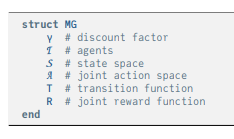

### Ćwiczenie 3

- Podaj definicję Gry Markowa na dowolnym przykładzie
- Wskaż główne różnice pomiędzy Procesem Decyzyjnym Markowa a Grą Markowa
- Jakie są główne typy Gier Markowa?
- W grze Markowa funkcja przejścia (*transition function*) zależy od wspólnych działań wszystkich graczy (*joint action*). W kółko i krzyżyk, grze turowej, w danym momencie działa tylko jeden gracz, podczas gdy drugi czeka. Jak zdefiniowałbyś 'wspólne działanie' dla danej tury w kółko i krzyżyk? Podaj przykład.

### Rozwiązanie 3

1. Gra Markowa

Jest to uogólnienie MDP, w którym bierze udział więcej niż jeden gracz, a każdy z nich podejmuje decyzje wpływające na stan środowiska i nagrody

Przykład gry Markowa: "polowanie na jelenia"

Dwóch myśliwych może współpracować, by upolować jelenia (duża nagroda), lub działać samodzielnie, polując na królika (mała nagroda).

- Stany: np. „polowanie rozpoczęte”, „zwierzę w zasięgu”, „koniec rundy”.
- Akcje graczy: „współpracuj”, „działaj sam”.
- Przejście: jeśli obaj współpracują → sukces jelenia; jeśli choć jeden działa sam → królik (dla niego), brak jelenia.
- Nagrody: jeleń → wysoka wspólna nagroda, królik → niska indywidualna.

2. Różnice między MDP a Grą Markowa

- Liczba graczy (1 vs wielu)
- Funkcja przejścia (zależna od jednej akcji vs zależna od wspólnej akcji wszystkich graczy)
- Strategia (zwykła maksymalizacja własnej nagrody vs przewidywanie działań innych graczy)

3. Typy Gier Markowa

- Kooperacyjne – gracze mają wspólną funkcję nagrody i wspólny cel (np. zespół robotów).
- Konkurencyjne (zero-jedynkowe) – zysk jednego gracza = strata drugiego (np. szachy, poker).
- Mieszane – nagrody są częściowo wspólne, częściowo sprzeczne (np. gry ekonomiczne).
- Symetryczne – role graczy są wymienne (jak w kółko i krzyżyk).

4. "Wspólne działanie" w kółko i kzyżyk

"Wspólne działanie" jako para akcji w kółko i krzyżyk oparta by była na tym, że jeden gracz w ramach swojej akcji wykonuje ruch, kiedy drugi w ramach swojej nie robi nic.

Przykład joint action:
- Gracz X wypełnia pole, gracz O nie wypełnia pola
- Gracz X nie wypełnia żadnego pola, gracz O wypełnia pole
- etc.

## Independent Q-Learning (IQL)

In [1]:
!!pip install open_spiel

['Collecting open_spiel',
 '  Downloading open_spiel-1.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.7 kB)',
 'Requirement already satisfied: pip>=20.0.2 in /usr/local/lib/python3.11/dist-packages (from open_spiel) (24.1.2)',
 'Requirement already satisfied: attrs>=19.3.0 in /usr/local/lib/python3.11/dist-packages (from open_spiel) (25.3.0)',
 'Requirement already satisfied: absl-py>=0.10.0 in /usr/local/lib/python3.11/dist-packages (from open_spiel) (1.4.0)',
 'Requirement already satisfied: numpy>=1.21.5 in /usr/local/lib/python3.11/dist-packages (from open_spiel) (2.0.2)',
 'Requirement already satisfied: scipy>=1.10.1 in /usr/local/lib/python3.11/dist-packages (from open_spiel) (1.14.1)',
 'Collecting ml-collections>=0.1.1 (from open_spiel)',
 '  Downloading ml_collections-1.1.0-py3-none-any.whl.metadata (22 kB)',
 'Requirement already satisfied: PyYAML in /usr/local/lib/python3.11/dist-packages (from ml-collections>=0.1.1->open_spiel) (6.0.2)',
 'Downloa

In [2]:
import pyspiel
import random
from collections import defaultdict
from collections import Counter
from open_spiel.python.algorithms import minimax

# Epsilon-greedy action selection
def choose_action(q_table, state_str, legal_actions, epsilon):
    if random.random() < epsilon:
        return random.choice(legal_actions)
    else:
        q_values = [q_table[state_str][a] for a in legal_actions]
        max_q = max(q_values)
        best_actions = [a for a, q in zip(legal_actions, q_values) if q == max_q]
        return random.choice(best_actions)

# Parameters
alpha = 0.05            # 0.1   # Learning rate
gamma = 1.0             # 1.0   # Discount factor (no discounting for Tic-Tac-Toe)
epsilon = int(1e-5)     # 0.1   # Exploration rate
num_episodes = int(1e4) # 10000 # Number of training episodes

# Load the Tic-Tac-Toe game
game = pyspiel.load_game("tic_tac_toe")

# Initialize Q-tables for both players (player 0 and player 1)
q_tables = [defaultdict(lambda: defaultdict(float)) for _ in range(2)]

# Training loop
for episode in range(num_episodes):
    state = game.new_initial_state()
    while not state.is_terminal():
        s = str(state)
        current_player = state.current_player()
        legal_actions = state.legal_actions()
        a = choose_action(q_tables[current_player], s, legal_actions, epsilon)
        state.apply_action(a)  # s' where opponent acts
        r1 = state.rewards()[current_player]
        if not state.is_terminal():
            s_next = str(state)
            opp_action = choose_action(q_tables[1 - current_player], s_next, state.legal_actions(), epsilon)
            state.apply_action(opp_action)  # s'' where current player acts again
            r2 = state.rewards()[current_player]
            if state.is_terminal():
                target = r1 + gamma * r2  # Adjust based on game reward structure
            else:
                s_next_next = str(state)
                max_q = max(q_tables[current_player][s_next_next].values(), default=0.0)
                target = r1 + gamma * max_q
        else:
            target = r1
        q_tables[current_player][s][a] += alpha * (target - q_tables[current_player][s][a])

In [3]:
def evaluate(q_tables, game):
    """
    Evaluate the trained Q-learning agents against a minimax agent.
    Args:
        q_tables: List of Q-tables, one for each player.
        game: The Tic-Tac-Toe game object from pyspiel.
    """
    # Policy for Q-learning agent: selects the best action greedily
    def make_q_policy(player_id):
        def q_policy(state):
            s = str(state)
            legal_actions = state.legal_actions()
            # Use 0.0 as default Q-value for unseen actions
            q_values = [q_tables[player_id][s].get(a, 0.0) for a in legal_actions]
            max_q = max(q_values)
            best_actions = [a for a, q in zip(legal_actions, q_values) if q == max_q]
            chosen_action = random.choice(best_actions)  # Random tie-breaking
            return [(chosen_action, 1.0)]  # Deterministic policy
        return q_policy

    # Policy for minimax agent: selects the optimal action
    def minimax_policy(state):
        current_player = state.current_player()
        _, best_action = minimax.alpha_beta_search(game, state, maximizing_player_id=current_player)
        return [(best_action, 1.0)]

    # Function to play one game between two policies
    def play_game(policy0, policy1):
        state = game.new_initial_state()
        while not state.is_terminal():
            current_player = state.current_player()
            action = (policy0(state) if current_player == 0 else policy1(state))[0][0]
            state.apply_action(action)
        return state.returns()  # Returns [reward_p0, reward_p1]

    # Number of games for evaluation
    num_games = 100

    # Evaluate Q-learning player 0 vs minimax player 1
    q_policy_0 = make_q_policy(0)
    minimax_pol = minimax_policy
    results_p0 = [play_game(q_policy_0, minimax_pol)[0] for _ in range(num_games)]
    counts_p0 = Counter(results_p0)
    print("Q-learning as player 0 vs minimax as player 1:")
    print(f"  Wins: {counts_p0[1]}, Draws: {counts_p0[0]}, Losses: {counts_p0[-1]}")

    # Evaluate Q-learning player 1 vs minimax player 0
    q_policy_1 = make_q_policy(1)
    results_p1 = [play_game(minimax_pol, q_policy_1)[1] for _ in range(num_games)]
    counts_p1 = Counter(results_p1)
    print("Q-learning as player 1 vs minimax as player 0:")
    print(f"  Wins: {counts_p1[1]}, Draws: {counts_p1[0]}, Losses: {counts_p1[-1]}")

    # Optional: Q-learning player 0 vs Q-learning player 1
    results_qq = [play_game(q_policy_0, q_policy_1)[0] for _ in range(num_games)]
    counts_qq = Counter(results_qq)
    print("Q-learning player 0 vs Q-learning player 1 (from player 0's perspective):")
    print(f"  Player 0 Wins: {counts_qq[1]}, Draws: {counts_qq[0]}, Player 1 Wins: {counts_qq[-1]}")

# Call this after training
evaluate(q_tables, game)

Q-learning as player 0 vs minimax as player 1:
  Wins: 0, Draws: 100, Losses: 0
Q-learning as player 1 vs minimax as player 0:
  Wins: 0, Draws: 0, Losses: 100
Q-learning player 0 vs Q-learning player 1 (from player 0's perspective):
  Player 0 Wins: 97, Draws: 3, Player 1 Wins: 0


### Ćwiczenie 4

- Czym jest Independent Q-Learning i czym różni się od standardowego Q-Learningu?
- Jaka jest kluczowa wada lub ograniczenie Independent Q-Learningu, które może powodować problemy w praktyce?
- Czy możesz wymyślić rzeczywisty przykład, w którym Independent Q-Learning mógłby zostać zastosowany?
- Co oznacza stacjonarność w kontekście uczenia ze wzmocnieniem i Independent Q-Learningu?
- Czy możesz wyjaśnić, czym różni się Nash Q-learning od Independent Q-learning w wieloagentowym uczeniu ze wzmocnieniem, szczególnie pod względem tego, jak agenci uwzględniają działania innych i optymalizują swoje strategie? Jakie ma to implikacje w praktyce?
- Wyjaśnij różnicę w złożoności obliczeniowej wraz ze wzrostem liczby agentów w obu algorytmach

- Wynik ewaluacji IQL vs minimax jest następujący:
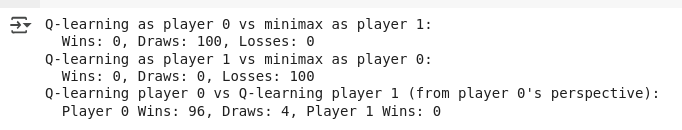


- Zastanów się (i opisz), dlaczego agent Q-learning najpierw doprowadza do remisu a potem przegrywa? Spróbój zmienić parametry uczenia aby zmienić rezultat

### Rozwiązanie 4

1. Independent Q-Learning

Independent Q-Learning (IQL) to proste rozszerzenie klasycznego Q-Learningu na środowiska z wieloma agentami. W ramach niego kazdy agent traktutuje innych agentów jako część środowiska - nie modeluje ich działań ani nie przewiduje zachowań. Przez to każdy agent uczy się niezależnie, jakby działał sam na środowisku, ale bierze pod uwagę obecnośc innych agentów.

2. Kluczowa wada Independent Q-Learningu

Kluczowa wada wynika z nie-stacjonarności środowiska. Ponieważ inni agenci również się uczą i zmieniają swoje polityki, środowisko względem pojedynczego agenta zawiera zmiany niezależne od jego akcji. Powoduje to niestabilność prowadzącą do braku gwarancji zbieżności, a optymalna ścieżka, której agent szuka, omże się zmieniać.

3. Rzeczywisty przykład zastosowanie IQL

Patrolowanie przetrzeni przy użyciu dronów - każdy z nich szuka ścieżki patrolowania po przestrzeni, która nie jest aktualnie patrolowana przez inne drony. Stąd każdy niezależnie szuka w swoim otoczeniu miejsc najdalej położonych od innych dronów.

4. Stacnojnarność w kontekście RL oraz IQL

Stacjonarność oznacza, że niektóre elementy (funkcja przejścia stanu, rozkład nagród, polityki agentów) nie zmieniają się w czasie.

5. Różnice między Nash Q-Learning, a IQL

- Przejścia do innych agentów (modeluje przejścia, zakłada racjonalność vs ignoruje je)
- Aktualizacja tablicy Q (bierze pod uwagę równowagę Nasha vs działa tylko na podstawie własnej akcji)
- Wspólna funkcja Q (Jest, zależna od wszystkich działań vs nie ma)
- Założenie koordytancji (jest vs nie ma)
- Poziom stabilności (większa im mniej agentów vs niestabilna)

6. Złożoność obliczeniowa wraz ze wzrostem agentów

- Nash Q-Learning - wzrost wykładniczy przez analizę oraz rozwiązywanie "Nsh equilibrium" w każdej turze
- IQL - wzorst liniowy, każdy agent aktualizuje niezależnie bez analizy

7. Dlaczego agent Q-learning najpierw doprowadza do remisu a potem przegrywa

Wynika to z tego, że jako gracz 0 nauczył się unikać unikać błędnych ruchów, minimalizować przegraną, co prowadzi do regularnych remisów. Natomiast jako gracz 1 otrzymuje ruchy będące odpowiedzią przez co nie ma dokładnych informacji jak odpowiednio zareagować na gracza. Przez to optymalne ruchy przeciwnika prowadzą go do częstej wygranej. Powoduje to problemy z prawidłową propagacją informacji o wartości danego stanu i przyznania odpowiedniej nagrody..

Zastosowana zmiana parametrów:
1. Zamniejszenie współczynnika uczenia "alpha"
2. Zmnijeszenie współczynnika eksploracji "epsilon"
3. Brak zmian współczynnika dyskontowania "gamma"
4. Zwiększenie cykli uczenia "num_episodes"

Udało się dokonać remisów grając jako player 1